In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import tweepy
import json
%matplotlib inline

# supress warnings from final output
import warnings
warnings.simplefilter('ignore')

## Gathering
Data source:
- twitter-archived-enhanced.csv file provided by the project
- image-prediction.tsv file programmatically download through a given url
- additional data download from the Twitter API

In [5]:
# load the dataset
archv_df = pd.read_csv('twitter-archive-enhanced.csv')
archv_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### *Download the image-prediction.tsv file via the provided url link*

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    
response = requests.get(url)

folder_name = 'image_prediction'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

os.listdir(folder_name)

img_predctn_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
img_predctn_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### *Download the tweet data through the Twitter API for retweet and favorite counts.*

In [7]:
key = 'HAS BEEN REMOVED'
key_secret = 'HAS BEEN REMOVED'
token = 'HAS BEEN REMOVED'
token_secret = 'HAS BEEN REMOVED'

# create variables for tweepy query
auth = tweepy.OAuthHandler(key, key_secret)
auth.set_access_token(token, token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
tweet_ids = list(archv_df['tweet_id'])

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True,
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        #print(tweet_ids.index(tweet) + 1, '/', '2354')
    except:
        print('Error for: ' + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096


Rate limit reached. Sleeping for: 888


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 932


In [63]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [64]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count'] # + data[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                    'retweets': retweets,
                    'favorites': favorites})

tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,7718,36249
1,892177421306343426,5704,31268
2,891815181378084864,3781,23542
3,891689557279858688,7878,39545
4,891327558926688256,8489,37768


## Assessment
The three DataFrames for assessment are listed below.
- archv_df contains the tweet's text, rating, and dog breeds categories records
- img_predctn_df contains the records of tweet image predictions from a neural network
- tweets_df contains the retweet and favorite tweet counts

#### *First, let's get a general idea of the three DataFrames through checking their info and descriptive statistics one by one.*

In [65]:
# check the archv_df DataFrame info
archv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [66]:
# check the img_predctn_df DataFrame info
img_predctn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [67]:
# check the tweets_df DataFrame info
tweets_df.info() # note that the tweet_id data type in tweets_df is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   retweets   2331 non-null   int64 
 2   favorites  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [68]:
# check the archv_df DataFrame descriptive statistics
archv_df.describe()

# note that the rating_denominator != 10 should be listed as errors

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [69]:
archv_df.iloc[45]

tweet_id                      883482846933004288                                                                                                                      
in_reply_to_status_id         NaN                                                                                                                                     
in_reply_to_user_id           NaN                                                                                                                                     
timestamp                     2017-07-08 00:28:19 +0000                                                                                                               
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                      
text                          This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt94

**Note** *that on 'row 46' the correct rating in in the tweet tet is 13.5 but it's extracted as 5.*
*Because the rating in the tweet text has a decimal, so the 'rating_numerator' column datatype should be 'float' instead of 'int'.*

In [70]:
# check the img_predctn_df DataFrame descriptive statistics
img_predctn_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [71]:
# check the tweets_df DataFrame descriptive statistics
tweets_df.describe()

,retweets,favorites
count,2331.00000,2331.000000
mean,2707.48048,7571.166881
std,4578.34282,11750.935157
min,1.00000,0.000000
25%,548.00000,1320.500000
50%,1269.00000,3291.000000
75%,3146.00000,9267.000000
max,77917.00000,156386.000000


*Check the duplicated rows in all rows*

In [72]:
assert [archv_df.duplicated() == False]

In [73]:
assert [img_predctn_df.duplicated() == False]

In [74]:
assert [tweets_df.duplicated() == False]

>- No duplicated data were found in all three DataFrames.

In [75]:
all_columns = pd.Series(list(archv_df) + list(img_predctn_df) + list(tweets_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

***First focus on the archv_df DataFrame data assessment.***

In [76]:
archv_df[archv_df['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [77]:
archv_df['name'].value_counts().head()

None       745
a          55 
Charlie    12 
Oliver     11 
Lucy       11 
Name: name, dtype: int64

>- *The set denominator number is 10. Any denominator other than 10 could be errors.*

*Further investigate the denominator numbers below.*

In [78]:
archv_df['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

>- *Although the numerator greater than the denominator should be fine, but the row which denominator == 0 must be an error which need to be dropped.*

In [79]:
archv_df[archv_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [80]:
# set the display colwidth to see the whole text contents
pd.set_option('display.max_colwidth', -1)
archv_df['text'].head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [81]:
archv_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

>- *Although the numerator greater than denominator is a fun part of WeRateDogs, but the extreme values like 1776 will make the project unable to carry out any meaningful statistical measurement. The extreme values in the numerator should be regarded as errors?*

>- *Alternatively, the extreme numerators reflects the fondness of the dogs receive from human. It can be interpretated in different ways.*

In [82]:
# check the total missing values of each varialbe in archv_df
archv_df.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [83]:
archv_df.name.str.islower().sum()

109

In [84]:
archv_df[archv_df.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


In [85]:
archv_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

***img_predctn_df assessment***

In [86]:
# check the top 5 rows of img_predctn_df
img_predctn_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [87]:
# sort out the total counts of each identified dog breed
img_predctn_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
dining_table          1  
park_bench            1  
hay                   1  
studio_couch          1  
stove                 1  
Name: p1, Length: 378, dtype: int64

In [88]:
rare_img = img_predctn_df.groupby('p1').filter(lambda x: len(x) < 3)
rare_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [89]:
rare_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.710000e+02,271.000000,271.000000,271.000000,2.710000e+02
mean,7.245551e+17,1.177122,0.501040,0.125570,6.170825e-02
std,6.724361e+16,0.499993,0.280970,0.093727,4.571094e-02
min,6.660519e+17,1.000000,0.070076,0.000018,5.595040e-07
25%,6.722438e+17,1.000000,0.265207,0.054843,2.753850e-02
50%,6.892838e+17,1.000000,0.447893,0.105307,5.508610e-02
75%,7.617092e+17,1.000000,0.734948,0.172324,8.691985e-02
max,8.924206e+17,4.000000,0.999945,0.460565,2.551820e-01


***Focus on tweets_df DataFrame***

In [90]:
# sort the tweets_df data by retweet_count counts
tweets_df.sort_values(['retweets'], ascending = False).head()

,tweet_id,retweets,favorites
1015,744234799360020481,77917,156386
1055,739238157791694849,57761,115553
517,807106840509214720,56801,120856
397,822872901745569793,43882,133227
65,879415818425184262,40651,99371


In [91]:
# check the tweets_df DataFrame's duplicates
tweets_df = tweets_df.drop_duplicates()

## Identified issues

### Tidiness issues

#### archv_df
>- The tweets_df and img_predctn_df can be integrated into archv_df
>- The dog stages are in four separate columns
>- Some columns missing too much values


### Quality issues

#### archv_df
>- The columns 'in_reply_to', 'in_reply_to', and 'retweeted_status_id' missing too many values compare to 'tweet_id'.
>- Erroneous datatypes (timestamp, tweet_id, dog_stages, rating_numerator, rating_denominator)
>- Two records' 'rating_numinator' value are zero.
>- There are extreme 'rating_numinator' values exist.
>- One record's 'rating_demoninator' value is zero.
>- The wrong 'rating_demoninator' values exist.
>- Missing values in 'name' and 'dog_stages'.
>- The name values are not consistent.
>- The first letter of dog names are not consistent.


>- There are many invalid names present in the 'name' column, which all start with lower case letters.
>- Some of the rating_numerator are not correctly extracted from the tweet text.


## Data Cleaning
### Tidiness
#### Define: retweet and favorite counts in tweets_df table
#### *Code: Convert tweet_id in archv_df to string. Inner join archv_df, tweets_df, and img_predctn_df through tweet_id*

In [92]:
# make copies of the three DataFrames for cleaning 
archv_cln = archv_df.copy()
img_predctn_cln = img_predctn_df.copy()
tweets_cln = tweets_df.copy()

In [93]:
img_predctn_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

*Check the decimal ratings in the dataset*

In [95]:
archv_cln[archv_cln.text.str.contains(r'(\d+\.\d*\/\d+)')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


#### Define: The 'rating_numerator' column should be type *float* and also it should be correctly extracted from the text column
#### Code: Convert the data type of 'rating_numerator' to *float*. Besides, correct the 'rating_numerator' extracted from the text column

In [96]:
archv_cln['rating_numerator'] = archv_cln['rating_numerator'].astype('float')
archv_cln['rating_denomonator'] = archv_cln['rating_denominator'].astype('float')

In [97]:
archv_cln.loc[(archv_cln['tweet_id'] == 883482846933004288) & (archv_cln['rating_numerator'] == 5),
              ['rating_numerator']] = 13.5
archv_cln.loc[(archv_cln['tweet_id'] == 832215909146226688) & (archv_cln['rating_numerator'] == 75),
              ['rating_numerator']] = 9.75
archv_cln.loc[(archv_cln['tweet_id'] == 786709082849828864) & (archv_cln['rating_numerator'] == 75),
              ['rating_numerator']] = 9.75
archv_cln.loc[(archv_cln['tweet_id'] == 778027034220126208) & (archv_cln['rating_numerator'] == 27),
              ['rating_numerator']] = 11.27
archv_cln.loc[(archv_cln['tweet_id'] == 681340665377193984) & (archv_cln['rating_numerator'] == 5),
              ['rating_numerator']] = 9.5
archv_cln.loc[(archv_cln['tweet_id'] == 680494726643068929) & (archv_cln['rating_numerator'] == 26),
              ['rating_numerator']] = 11.26

#### Test

In [98]:
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [99]:
tweets_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   retweets   2331 non-null   int64 
 2   favorites  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 72.8+ KB


#### Define: The 'tweet_id' datatype in archv_cln and img_predctn_cln is incorrect
#### Code: Convert the 'tweet_id' in archv_cln and img_predctn_cln to string

In [100]:
# convert the int(tweet_id) to str(tweet_id)
archv_cln['tweet_id'] = archv_cln['tweet_id'].astype(str)
img_predctn_cln['tweet_id'] = img_predctn_cln['tweet_id'].astype(str)

# combine the three DataFrames into one archv_cln table through inner join on 'tweet_id'
archv_cln = pd.merge(archv_cln, img_predctn_cln,
                     how = 'inner', on = 'tweet_id')
archv_cln = pd.merge(archv_cln, tweets_cln,
                     how = 'inner', on = 'tweet_id')

# check the newly combined archv_cln dataframe
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   float64
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

In [101]:
archv_cln.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
1032,710844581445812225,NaN,NaN,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Staniel. His selfie game is strong af. 10/10 I'd snapchat with Staniel https://t.co/UgkTw7TKyM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581445812225/photo/1,...,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True,685,2532
1086,706681918348251136,NaN,NaN,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Katie. She's a Mitsubishi Hufflepuff. Curly af. 12/10 I'd do terrible things to acquire such a pup https://t.co/CFPIcGcwJv,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/706681918348251136/photo/1,https://twitter.com/dog_rates/status/706681918348251136/photo/1,https://twitter.com/dog_rates/status/706681918348251136/photo/1",...,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True,968,3288
1041,710117014656950272,NaN,NaN,2016-03-16 14:54:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper got her hair chalked for her birthday. Hasn't told her parents yet. Rebellious af. 11/10 very nifty https://t.co/h1OX2mLtxV,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/710117014656950272/photo/1,https://twitter.com/dog_rates/status/710117014656950272/photo/1",...,0.802092,True,miniature_poodle,0.111647,True,cocker_spaniel,0.062866,True,1983,5467


#### Define: archv_cln table contains four separate columns of dog stages variables
#### *Code: melt dog stage columns into one column*

In [102]:
archv_cln = pd.melt(archv_cln,
                    id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                               'timestamp', 'source', 'text', 'retweeted_status_id',
                               'retweeted_status_user_id', 'retweeted_status_timestamp',
                               'expanded_urls', 'rating_numerator', 'rating_denominator',
                               'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                               'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                               'p3_dog'], value_name = 'dog_stage')
#archv_cln.info()
archv_cln = archv_cln.drop('variable', axis = 1)

#### Test

In [103]:
# check the dataframe
archv_cln.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
7525,685315239903100929,NaN,NaN,2016-01-08 04:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I would like everyone to appreciate this pup's face as much as I do. 11/10 https://t.co/QIe7oxkSNo,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/685315239903100929/photo/1,https://twitter.com/dog_rates/status/685315239903100929/photo/1",...,chow,0.470162,True,Pomeranian,0.159677,True,Eskimo_dog,0.105074,True,None
5203,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761596989440/photo/1,...,wild_boar,0.859499,False,hog,0.128981,False,warthog,0.011318,False,None
9918,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fletcher. He's had a ruff night. No more Fireball for Fletcher. 8/10 it'll be over soon pupper https://t.co/tA4WpkI2cw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804208660480/photo/1,...,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,0.025456,False,10


In [104]:
len(archv_cln[archv_cln['dog_stage'] != 'None'])

2390

In [105]:
archv_cln['dog_stage'].value_counts() # after melt the four columns into one, ~four fold of row number expansion

None       7905
10.0       2041
pupper     221 
doggo      78  
puppo      24  
floofer    8   
50.0       3   
80.0       2   
11.0       2   
120.0      1   
110.0      1   
90.0       1   
130.0      1   
70.0       1   
150.0      1   
40.0       1   
20.0       1   
170.0      1   
7.0        1   
2.0        1   
Name: dog_stage, dtype: int64

In [106]:
archv_cln.info()  # after melt the four columns into one, ~four fold of row number expansion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10295 entries, 0 to 10294
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    10295 non-null  object 
 1   in_reply_to_status_id       115 non-null    float64
 2   in_reply_to_user_id         115 non-null    float64
 3   timestamp                   10295 non-null  object 
 4   source                      10295 non-null  object 
 5   text                        10295 non-null  object 
 6   retweeted_status_id         360 non-null    float64
 7   retweeted_status_user_id    360 non-null    float64
 8   retweeted_status_timestamp  360 non-null    object 
 9   expanded_urls               10295 non-null  object 
 10  rating_numerator            10295 non-null  float64
 11  rating_denominator          10295 non-null  int64  
 12  name                        10295 non-null  object 
 13  retweets                    102

***Because four columns have been melted into one column, three duplicates of the original rows have been generated.***

>- *need to drop the duplicates but keep the dog stage containing rows*

In [107]:
# keep one of three duplicates with 'None'
dup_1 = archv_cln.drop_duplicates(subset = ['tweet_id', 'dog_stage']) # only consider 'tweet_id' & 'dog_stage' for drop rows
#dup_1 = archv_cln.drop_duplicates() # keep one duplicate that 'tweet_id' one copy and 'dog_stage' contains 'None'


dup_1['dog_stage'].value_counts()

None       2059
10.0       2041
pupper     221 
doggo      78  
puppo      24  
floofer    8   
50.0       3   
80.0       2   
11.0       2   
120.0      1   
110.0      1   
90.0       1   
130.0      1   
70.0       1   
150.0      1   
40.0       1   
20.0       1   
170.0      1   
7.0        1   
2.0        1   
Name: dog_stage, dtype: int64

In [108]:
# keep rows with dog stage (exclude the rows without dog_stage info)
dup_pos = archv_cln.duplicated(subset = 'tweet_id', keep = False)
dup_2 = archv_cln[dup_pos]
dup_2 = dup_2[dup_2['dog_stage'] != 'None']

dup_2['dog_stage'].value_counts()

10.0       2041
pupper     221 
doggo      78  
puppo      24  
floofer    8   
50.0       3   
80.0       2   
11.0       2   
130.0      1   
120.0      1   
110.0      1   
90.0       1   
170.0      1   
70.0       1   
40.0       1   
20.0       1   
150.0      1   
7.0        1   
2.0        1   
Name: dog_stage, dtype: int64

In [109]:
# combine dup_1 and dup_2
dup_1 = dup_1.drop_duplicates(subset = 'tweet_id', keep = False) 
dup_merged = dup_1.append(dup_2)

dup_merged['dog_stage'].value_counts()

10.0       2041
pupper     221 
doggo      78  
puppo      24  
floofer    8   
50.0       3   
80.0       2   
11.0       2   
130.0      1   
120.0      1   
110.0      1   
90.0       1   
170.0      1   
70.0       1   
40.0       1   
20.0       1   
150.0      1   
7.0        1   
2.0        1   
Name: dog_stage, dtype: int64

In [110]:
dup_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390 entries, 9 to 10294
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2390 non-null   object 
 1   in_reply_to_status_id       27 non-null     float64
 2   in_reply_to_user_id         27 non-null     float64
 3   timestamp                   2390 non-null   object 
 4   source                      2390 non-null   object 
 5   text                        2390 non-null   object 
 6   retweeted_status_id         87 non-null     float64
 7   retweeted_status_user_id    87 non-null     float64
 8   retweeted_status_timestamp  87 non-null     object 
 9   expanded_urls               2390 non-null   object 
 10  rating_numerator            2390 non-null   float64
 11  rating_denominator          2390 non-null   int64  
 12  name                        2390 non-null   object 
 13  retweets                    2390

In [111]:
# locate the duplicated tweet_id rows
remain_dup = dup_merged[dup_merged.duplicated(subset = 'tweet_id', keep = False)]
remain_dup['tweet_id'].value_counts()

770093767776997377    3
759793422261743616    3
751583847268179968    3
785639753186217984    3
854010172552949760    3
                     ..
747963614829678593    2
750868782890057730    2
819006400881917954    2
813127251579564032    2
819015331746349057    2
Name: tweet_id, Length: 318, dtype: int64

In [112]:
# check one set of duplicated tweet_id rows for details
remain_dup[remain_dup['tweet_id'] == '817777686764523521'] # the same dog received different dog_stage evaluation

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
357,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4475,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper
8593,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,10


#### Define: Duplicate tweets from multiple dog stages values
#### *Code: Multiple stages show up in 13 tweets. Change dog_stage to multiple, drop duplicates. Remove drop duplicates from the archv_cln based on tweet_id followed by appending multiple rows.*

In [113]:
remain_dup['dog_stage'] = 'multiple'
dup_drops = remain_dup.drop_duplicates()
dup_drops['tweet_id'].value_counts()

831315979191906304    1
825535076884762624    1
693629975228977152    1
776819012571455488    1
855851453814013952    1
                     ..
747963614829678593    1
801115127852503040    1
750868782890057730    1
819006400881917954    1
819015331746349057    1
Name: tweet_id, Length: 318, dtype: int64

In [114]:
dup_ids = set(remain_dup['tweet_id'])
for idx in dup_merged['tweet_id']:
    if idx in dup_ids:
        dup_merged['dog_stage'][dup_merged['tweet_id'] == idx] = 'multiple'
archv_cln = dup_merged.drop_duplicates()

archv_cln['dog_stage'].value_counts()

10.0        1723
multiple    318 
50.0        3   
80.0        2   
11.0        2   
170.0       1   
150.0       1   
130.0       1   
120.0       1   
110.0       1   
90.0        1   
70.0        1   
40.0        1   
20.0        1   
7.0         1   
2.0         1   
Name: dog_stage, dtype: int64

In [115]:
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 9 to 10294
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   float64
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  retweets                    2059

#### Define: 'timestamp', 'dog_stage', 'rating_numerator' columns datatypes are incorrect

#### *Code:*
- convert 'timestamp' and 'retweeted_status_timestamp' to datetime datatype.
- convert 'dog_stage' to categorical
- convert 'rating_numerator' to float


In [116]:
# convert the target columns' datatypes
archv_cln['timestamp'] = pd.to_datetime(archv_cln['timestamp'])
archv_cln['dog_stage'] = archv_cln['dog_stage'].astype('category')
#archv_cln['rating_numerator'] = archv_cln['rating_numerator'].astype('float')


# check
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 9 to 10294
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2059 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2059 non-null   datetime64[ns, UTC]
 4   source                      2059 non-null   object             
 5   text                        2059 non-null   object             
 6   retweeted_status_id         72 non-null     float64            
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2059 non-null   object             
 10  rating_numerator            2059 non-null   float64        

#### Define: 'in_reply_to_status_id' colum contains too much missing data. Besides, it shows if the tweet was original or a reply to another tweet.
#### *Code: drop all the rows cotain a value in this column that is not NaN.*

In [117]:
archv_cln = archv_cln[archv_cln['in_reply_to_status_id'].isnull()]

#### *Test*

In [118]:

archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 9 to 10294
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2036 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2036 non-null   datetime64[ns, UTC]
 4   source                      2036 non-null   object             
 5   text                        2036 non-null   object             
 6   retweeted_status_id         72 non-null     float64            
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2036 non-null   object             
 10  rating_numerator            2036 non-null   float64        

#### Define: The 'retweeted_status_id' still contains too much missing records.
#### *Code: remove the retweets by setting 'retweeted_status_id' isnull()*

In [119]:
archv_cln = archv_cln[archv_cln['retweeted_status_id'].isnull()]

#### *Test*

In [120]:
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 9 to 10294
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1964 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1964 non-null   datetime64[ns, UTC]
 4   source                      1964 non-null   object             
 5   text                        1964 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1964 non-null   object             
 10  rating_numerator            1964 non-null   float64        

In [121]:
archv_cln.name.str.islower().sum()   #archv_df.name.str.islower().sum()

98

In [122]:
archv_cln[archv_cln.name.str.islower()]['name']

743      one 
801      his 
858      just
4168     a   
4964     a   
        ..   
10288    an  
10289    a   
10291    a   
10292    a   
10293    a   
Name: name, Length: 98, dtype: object

#### Define: The invalid names start with lower case letters
#### *Code: identify all the invalid names and set them to None/NaN.*

In [123]:
#archv_cln = archv_cln[archv_cln['name'].str[0].str.islower().fillna(False)] #
archv_cln['name'] = map(lambda x: x[0].isupper(), archv_cln['name'])

#### *Test*

In [124]:
archv_cln.name.str.islower().sum()

0.0

In [125]:
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 9 to 10294
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1964 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1964 non-null   datetime64[ns, UTC]
 4   source                      1964 non-null   object             
 5   text                        1964 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1964 non-null   object             
 10  rating_numerator            1964 non-null   float64        

In [126]:
archv_cln['name'].value_counts()

<map object at 0x1a21cdafd0>    1964
Name: name, dtype: int64

#### Define: The coloumns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' missing too much info
#### *Code: Drop the coloumns missing too much info*

In [127]:
archv_cln = archv_cln.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                            'retweeted_status_id', 'retweeted_status_user_id',
                            'retweeted_status_timestamp' ], axis = 1)

# Test
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 9 to 10294
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1964 non-null   object             
 1   timestamp           1964 non-null   datetime64[ns, UTC]
 2   source              1964 non-null   object             
 3   text                1964 non-null   object             
 4   expanded_urls       1964 non-null   object             
 5   rating_numerator    1964 non-null   float64            
 6   rating_denominator  1964 non-null   int64              
 7   name                1964 non-null   object             
 8   retweets            1964 non-null   int64              
 9   favorites           1964 non-null   int64              
 10  jpg_url             1964 non-null   object             
 11  img_num             1964 non-null   int64              
 12  p1                  1964 non-null

In [128]:
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 9 to 10294
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1964 non-null   object             
 1   timestamp           1964 non-null   datetime64[ns, UTC]
 2   source              1964 non-null   object             
 3   text                1964 non-null   object             
 4   expanded_urls       1964 non-null   object             
 5   rating_numerator    1964 non-null   float64            
 6   rating_denominator  1964 non-null   int64              
 7   name                1964 non-null   object             
 8   retweets            1964 non-null   int64              
 9   favorites           1964 non-null   int64              
 10  jpg_url             1964 non-null   object             
 11  img_num             1964 non-null   int64              
 12  p1                  1964 non-null

#### Define: There are extreme and zero values in archv_df, which make the meaningful statistics impossible.
#### *Code: exclude all the extreme, incorrect, and zero values from the numerator and denuminator*

In [129]:
# exclude the rows with extreme and zero values of numerator and denominator
archv_cln = archv_cln[archv_cln['rating_numerator'] != 0]
archv_cln = archv_cln[archv_cln['rating_numerator'] <= 20]
archv_cln = archv_cln[archv_cln['rating_denominator'] >= 10]
archv_cln = archv_cln[archv_cln['rating_denominator'] < 20]

# check
print(len(archv_cln[archv_cln['rating_numerator'] > 20]))
print(len(archv_cln[archv_cln['rating_denominator'] < 10]))
print(len(archv_cln[archv_cln['rating_denominator'] > 20]))

0
0
0


In [130]:
archv_cln['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/676821958043033607/photo/1,https://twitter.com/dog_rates/status/676821958043033607/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/836001077879255040/photo/1,https://twitter.com/dog_rates/status/836001077879255040/photo/1,https://twitter.com/dog_rates/status/836001077879255040/photo/1,https://twitter.com/dog_rates/status/836001077879255040/photo/1    1
https://twitter.com/dog_rates/status/691756958957883396/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/671141549288370177/photo/1                                                                                                                                                          

In [131]:
archv_cln['p1'].value_counts()

golden_retriever      135
Labrador_retriever    89 
Pembroke              88 
Chihuahua             78 
pug                   54 
                      .. 
standard_schnauzer    1  
wooden_spoon          1  
dining_table          1  
bookshop              1  
remote_control        1  
Name: p1, Length: 372, dtype: int64

## Store the cleaned dataset

In [132]:
# save the archv_cln as csv file
archv_cln.to_csv('twitter_archive_master.csv', index = False)

In [133]:
archv_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 9 to 10294
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1946 non-null   object             
 1   timestamp           1946 non-null   datetime64[ns, UTC]
 2   source              1946 non-null   object             
 3   text                1946 non-null   object             
 4   expanded_urls       1946 non-null   object             
 5   rating_numerator    1946 non-null   float64            
 6   rating_denominator  1946 non-null   int64              
 7   name                1946 non-null   object             
 8   retweets            1946 non-null   int64              
 9   favorites           1946 non-null   int64              
 10  jpg_url             1946 non-null   object             
 11  img_num             1946 non-null   int64              
 12  p1                  1946 non-null

## Data Analysis and Visualization

### Distribution of Ratings

In [134]:
archv_cln[['rating_numerator', 'retweets', 'favorites', 'p1_conf']].describe()

,rating_numerator,retweets,favorites,p1_conf
count,1946.000000,1946.000000,1946.000000,1946.000000
mean,10.539455,2481.673176,8356.984584,0.593471
std,2.159121,4438.080787,12289.615179,0.272181
min,1.000000,11.000000,70.000000,0.044333
25%,10.000000,549.250000,1772.750000,0.360437
50%,11.000000,1194.000000,3773.000000,0.587222
75%,12.000000,2834.000000,10430.250000,0.844920
max,14.000000,77917.000000,156386.000000,1.000000


Text(0.5, 1.0, 'The Rating Numerator Distribution')

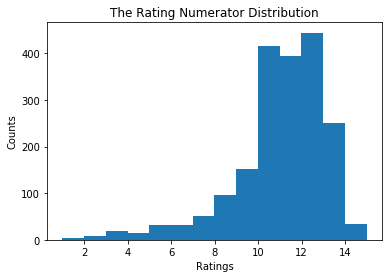

In [135]:
bin_edges = np.arange(0.99, archv_cln['rating_numerator'].max()+1, 1)

plt.hist(data = archv_cln, x = 'rating_numerator', bins = bin_edges);
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('The Rating Numerator Distribution')

>- The rating_numerator distribution is very left skewed.
>- 75% of the ranting_numerators are between 10 an 14.

### What is the most common dog stage

In [136]:
archv_cln['dog_stage'].value_counts()

10.0        1642
multiple    302 
11.0        2   
170.0       0   
150.0       0   
130.0       0   
120.0       0   
110.0       0   
90.0        0   
80.0        0   
70.0        0   
50.0        0   
40.0        0   
20.0        0   
7.0         0   
2.0         0   
Name: dog_stage, dtype: int64

In [137]:
dog_stage_pos_sum = sum(archv_cln['dog_stage'] != 'None')
tw_dog_stage = round(dog_stage_pos_sum * 100 / archv_cln.shape[0])

print('Number of tweets with stage: {}'.format(dog_stage_pos_sum))
print('Percentage of tweets: {}%'.format(round(tw_dog_stage, 3)))

Number of tweets with stage: 1946
Percentage of tweets: 100%


>- Only a small portion of the tweets contains identified dog stages information

### Which dog breeds were most tweeted?
- The dog breed information is demonstrated in the img_predctn part 'p1'.

In [138]:
str = "Number of tweets with 'none' predicted breed: {} ({}%)"
none_count = sum(archv_cln['p1'] == 'None')
none_perc = none_count * 100 / archv_cln.shape[0]
print(str.format(none_count, round(none_perc)))

str = 'Number of distinct breeds: {}'
print(str.format(len(archv_cln['p1'].unique())))

Number of tweets with 'none' predicted breed: 0 (0%)
Number of distinct breeds: 372


In [139]:
top10_breeds_count = \
archv_cln[archv_cln['p1'] != 'none']['p1'].value_counts().head(10)

print('Breed and number of tweets')
print('--------------------------')
print(top10_breeds_count)

top10_perc = round(sum(top10_breeds_count) * 100 / archv_cln.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_perc))

Breed and number of tweets
--------------------------
golden_retriever      135
Labrador_retriever    89 
Pembroke              88 
Chihuahua             78 
pug                   54 
chow                  41 
Samoyed               39 
Pomeranian            38 
toy_poodle            36 
malamute              29 
Name: p1, dtype: int64

Top 10 dog breeds make up 32% of all tweets


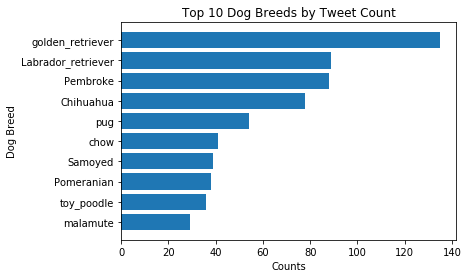

In [140]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Counts')
plt.ylabel('Dog Breed')
plt.title('Top 10 Dog Breeds by Tweet Count')
plt.gca().invert_yaxis()
plt.show()

>- The bar chart shows the neural network identified the most tweeted dog is the Golden Retriever.
>- Labrador Retrievers, Pembrokes, and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place.

### Which dog breeds receive the highest favorite counts?

In [141]:
fav_cnts_breed = archv_cln[archv_cln['p1'] != 'none']
fav_cnts_breed = fav_cnts_breed.groupby(['p1'])
fav_cnts_breed = fav_cnts_breed['favorites'].sum()
fav_cnts_breed = fav_cnts_breed.sort_values(ascending = False)
top10_breeds_fav_cnts = fav_cnts_breed.head(10)
top10_breeds_fav_cnts

p1
golden_retriever      1570397
Labrador_retriever    975963 
Pembroke              930639 
Chihuahua             642089 
Samoyed               480269 
French_bulldog        437742 
chow                  380051 
pug                   292161 
cocker_spaniel        288607 
Pomeranian            284696 
Name: favorites, dtype: int64

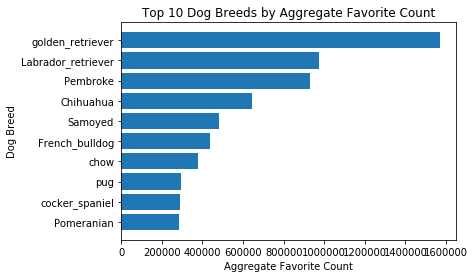

In [142]:
plt.barh(top10_breeds_fav_cnts.index, top10_breeds_fav_cnts)

plt.xlabel('Aggregate Favorite Count')
plt.ylabel('Dog Breed')
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count')
plt.gca().invert_yaxis()
plt.show();

The chart shows the most favorited dog breeds are very similar compare to the dog breeds that are tweeted the most.

### Is there a correlation between the retweet counts and favorites?

In [472]:
print(archv_cln['retweets'].describe())
print(archv_cln['favorites'].describe())

count    1945.000000 
mean     2482.474550 
std      4440.059722 
min      11.000000   
25%      548.000000  
50%      1194.000000 
75%      2834.000000 
max      77937.000000
Name: retweets, dtype: float64
count    1945.000000  
mean     8358.936247  
std      12293.710885 
min      71.000000    
25%      1772.000000  
50%      3767.000000  
75%      10443.000000 
max      156416.000000
Name: favorites, dtype: float64


Text(0.5, 1.0, 'Favorites vs. Retweets')

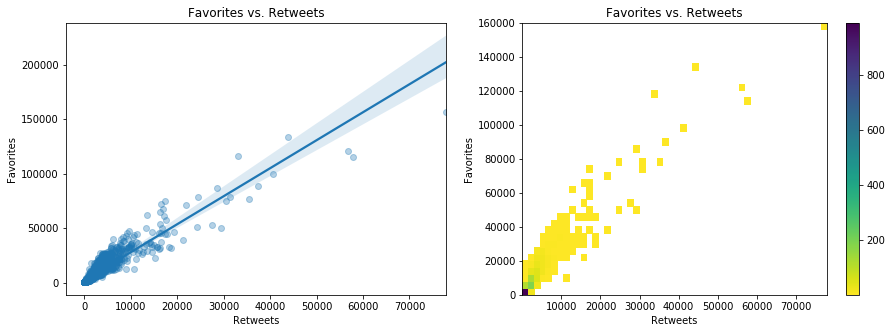

In [473]:
# set a big plot
plt.figure(figsize = [15, 5])

# left, regression plot
plt.subplot(1, 2, 1)
g = sb.regplot(x = archv_cln.retweets, y = archv_cln.favorites,
               scatter_kws = {'alpha' : 1/3})
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Favorites vs. Retweets')

# right, heatmap
plt.subplot(1, 2, 2)

# set the bin_edges
x_binsize = 1500
y_binsize = 4000
bins_x = np.arange(10, archv_cln['retweets'].max()+x_binsize, x_binsize)
bins_y = np.arange(0, archv_cln['favorites'].max()+y_binsize, y_binsize)

plt.hist2d(data = archv_cln, x = 'retweets', y = 'favorites', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Favorites vs. Retweets')

***The plots indicate there's a correlation between retweets and favorites***

*Let's calculate the correlation between the retweets and favorites to further confirm*

In [474]:
archv_cln.corr(method = 'pearson')

,rating_numerator,rating_denominator,retweets,favorites,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,-0.037728,0.295795,0.397241,0.200584,0.105977,0.288786,0.002453,0.251545,-0.030305,0.234389
rating_denominator,-0.037728,1.000000,0.089797,0.071798,0.045677,-0.005921,-0.017687,-0.002167,0.018542,0.017896,-0.016115
retweets,0.295795,0.089797,1.000000,0.929298,0.104444,0.048775,0.002783,-0.014581,0.013557,-0.037845,0.007559
favorites,0.397241,0.071798,0.929298,1.000000,0.128501,0.070408,0.044931,-0.016345,0.053096,-0.045268,0.035519
img_num,0.200584,0.045677,0.104444,0.128501,1.000000,0.201873,0.035414,-0.156327,0.056469,-0.137156,0.058711
p1_conf,0.105977,-0.005921,0.048775,0.070408,0.201873,1.000000,0.125764,-0.510291,0.140451,-0.708979,0.116336
p1_dog,0.288786,-0.017687,0.002783,0.044931,0.035414,0.125764,1.000000,0.109553,0.637061,0.048498,0.560760
p2_conf,0.002453,-0.002167,-0.014581,-0.016345,-0.156327,-0.510291,0.109553,1.000000,0.096958,0.479438,0.065240
p2_dog,0.251545,0.018542,0.013557,0.053096,0.056469,0.140451,0.637061,0.096958,1.000000,0.032454,0.557224
p3_conf,-0.030305,0.017896,-0.037845,-0.045268,-0.137156,-0.708979,0.048498,0.479438,0.032454,1.000000,0.036174


>- *Both regression plot and heatmap of 'retweets' and 'favorites' suggest there's a positive correlation between the two variables.*
>- *'retweets' is positively correlates with 'favorites' and the r^2 = 0.93, which is a high value indicating a strong positive relationship between 'retweets' and 'favorites' variables.*